# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


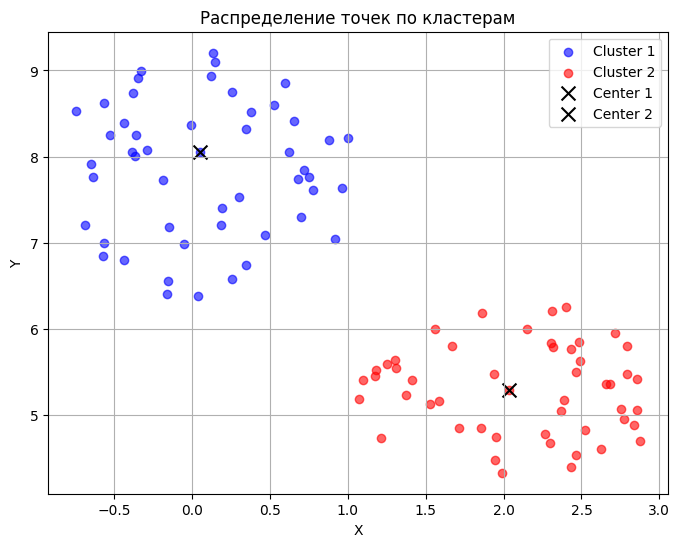

1041.006278 6671.173406499999


In [ ]:
import matplotlib.pyplot as plt

# Чтение данных из файла
with open("0.txt", "r") as f:
    lines = f.readlines()

a = [[] for _ in range(2)]

# Обработка строк файла
for line in lines[1:101]:  # Начинаем со 2-й строки и ограничиваемся 100 записями
    line = line.replace(',', '.')
    try:
        x, y = map(float, line.split('\t'))
        if -1 <= x <= 1.25 and 6 <= y <= 10:
            a[0].append((x, y))
        elif 1 <= x <= 3 and 4 <= y <= 6.5:
            a[1].append((x, y))
    except ValueError:
        continue  # Пропускаем строки с ошибками

colors = ['blue', 'red']
plt.figure(figsize=(8, 6))

# Визуализация кластеров
for i, cluster in enumerate(a):
    if cluster:  # Проверяем, что кластер не пустой
        cluster_x, cluster_y = zip(*cluster)
        plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

s_x = s_y = 0
num_clusters = 0

# Вычисление центроидов
for i, cluster in enumerate(a):
    if cluster:
        min_dist = float('inf')
        center_x = center_y = 0
        for point in cluster:
            total_dist = sum(((x - point[0])**2 + (y - point[1])**2)**0.5 for x, y in cluster)
            if total_dist < min_dist:
                min_dist = total_dist
                center_x, center_y = point
        s_x += center_x
        s_y += center_y
        num_clusters += 1
        plt.scatter(center_x, center_y, color='black', marker='x', s=100, label=f'Center {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Распределение точек по кластерам')
plt.grid()
plt.show()

# Вывод средних значений центроидов, умноженных на 1000
if num_clusters > 0:
    print((s_x / num_clusters) * 1000, (s_y / num_clusters) * 1000)


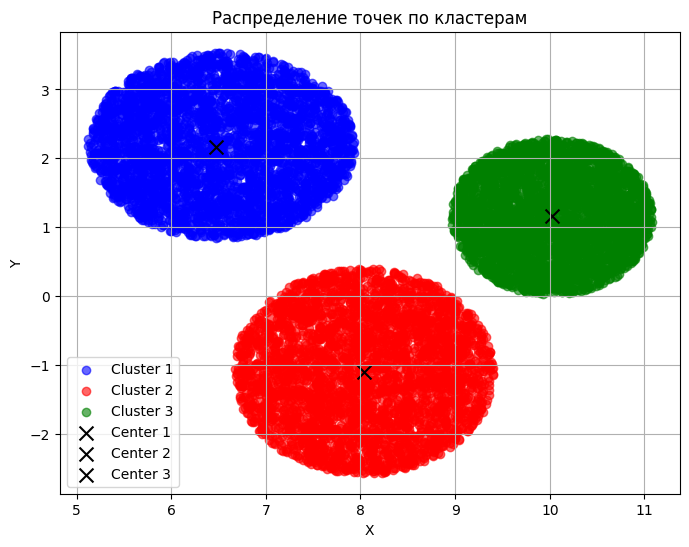

8177.530805000002 738.4186756666666


In [ ]:
import matplotlib.pyplot as plt

# Чтение данных из файла
with open("1.txt", "r") as f:
    lines = f.readlines()

a = [[] for _ in range(3)]

# Обработка строк файла
for line in lines[1:10000]:  # Начинаем со 2-й строки
    line = line.replace(',', '.')
    try:
        x, y = map(float, line.split('\t'))
        if y > 1 * x - 6.5:
            a[0].append((x, y))
        elif y < x * (-2 / 3) + 19 / 3:
            a[1].append((x, y))
        else:
            a[2].append((x, y))
    except ValueError:
        continue  # Пропускаем строки с ошибками

colors = ['blue', 'red', 'green']
plt.figure(figsize=(8, 6))

# Визуализация кластеров
for i, cluster in enumerate(a):
    if cluster:  # Проверяем, что кластер не пустой
        cluster_x, cluster_y = zip(*cluster)
        plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

s_x = s_y = 0
num_clusters = 0

# Вычисление центроидов
for i, cluster in enumerate(a):
    if cluster:
        min_dist = float('inf')
        center_x = center_y = 0
        for point in cluster:
            total_dist = sum(((x - point[0])**2 + (y - point[1])**2)**0.5 for x, y in cluster)
            if total_dist < min_dist:
                min_dist = total_dist
                center_x, center_y = point
        s_x += center_x
        s_y += center_y
        num_clusters += 1
        plt.scatter(center_x, center_y, color='black', marker='x', s=100, label=f'Center {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Распределение точек по кластерам')
plt.grid()
plt.show()

# Вывод средних значений центроидов, умноженных на 1000
if num_clusters > 0:
    print((s_x / num_clusters) * 1000, (s_y / num_clusters) * 1000)

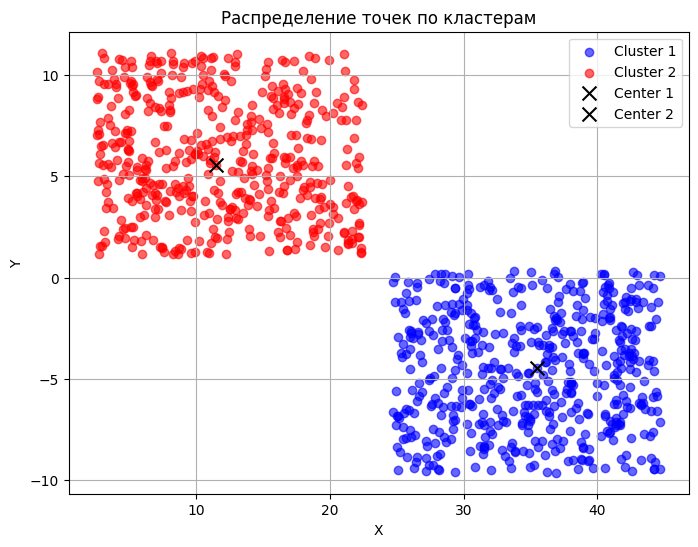

23509.902664999998 554.6822819999999


In [ ]:
import matplotlib.pyplot as plt

# Чтение данных из файла
with open("2.txt", "r") as f:
    lines = f.readlines()

a = [[] for _ in range(2)]

# Обработка строк файла
for line in lines[:1000]:  # Ограничиваемся 1000 записями
    line = line.replace(',', '.')
    try:
        x, y = map(float, line.split('\t'))
        if x > 24:
            a[0].append((x, y))
        else:
            a[1].append((x, y))
    except ValueError:
        continue  # Пропускаем строки с ошибками

colors = ['blue', 'red']
plt.figure(figsize=(8, 6))

# Визуализация кластеров
for i, cluster in enumerate(a):
    if cluster:  # Проверяем, что кластер не пустой
        cluster_x, cluster_y = zip(*cluster)
        plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

s_x = s_y = 0
num_clusters = 0

# Вычисление центроидов (используем манхэттенское расстояние)
for i, cluster in enumerate(a):
    if cluster:
        min_dist = float('inf')
        center_x = center_y = 0
        for point in cluster:
            total_dist = sum(abs(x - point[0]) + abs(y - point[1]) for x, y in cluster)
            if total_dist < min_dist:
                min_dist = total_dist
                center_x, center_y = point
        s_x += center_x
        s_y += center_y
        num_clusters += 1
        plt.scatter(center_x, center_y, color='black', marker='x', s=100, label=f'Center {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Распределение точек по кластерам')
plt.grid()
plt.show()

# Вывод средних значений центроидов, умноженных на 1000
if num_clusters > 0:
    print((s_x / num_clusters) * 1000, (s_y / num_clusters) * 1000)

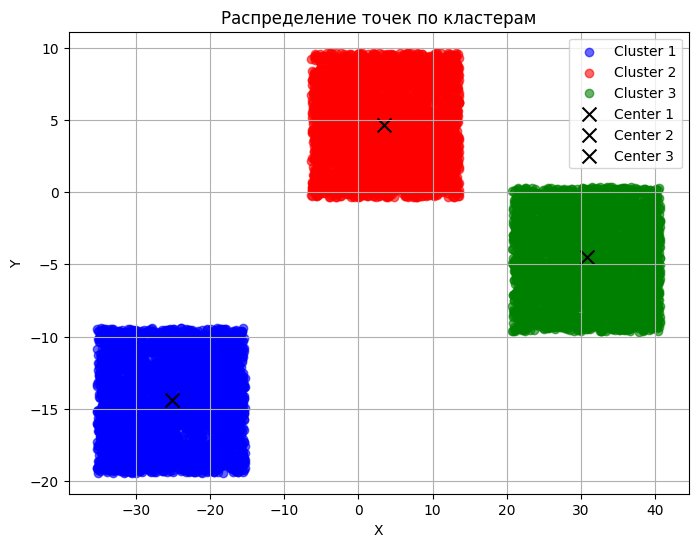

3078.894014666666 -4758.945237


In [ ]:
import matplotlib.pyplot as plt

# Чтение данных из файла
with open("3.txt", "r") as f:
    lines = f.readlines()

a = [[] for _ in range(3)]

# Обработка строк файла
for line in lines[:10000]:  # Ограничиваемся 10000 записями
    line = line.replace(',', '.')
    try:
        x, y = map(float, line.split('\t'))
        if x < -10 and y < -5:
            a[0].append((x, y))
        elif x < 17:
            a[1].append((x, y))
        else:
            a[2].append((x, y))
    except ValueError:
        continue  # Пропускаем строки с ошибками

colors = ['blue', 'red', 'green']
plt.figure(figsize=(8, 6))

# Визуализация кластеров
for i, cluster in enumerate(a):
    if cluster:  # Проверяем, что кластер не пустой
        cluster_x, cluster_y = zip(*cluster)
        plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

s_x = s_y = 0
num_clusters = 0

# Вычисление центроидов (используем манхэттенское расстояние)
for i, cluster in enumerate(a):
    if cluster:
        min_dist = float('inf')
        center_x = center_y = 0
        for point in cluster:
            total_dist = sum(abs(x - point[0]) + abs(y - point[1]) for x, y in cluster)
            if total_dist < min_dist:
                min_dist = total_dist
                center_x, center_y = point
        s_x += center_x
        s_y += center_y
        num_clusters += 1
        plt.scatter(center_x, center_y, color='black', marker='x', s=100, label=f'Center {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Распределение точек по кластерам')
plt.grid()
plt.show()

# Вывод средних значений центроидов, умноженных на 1000
if num_clusters > 0:
    print((s_x / num_clusters) * 1000, (s_y / num_clusters) * 1000)


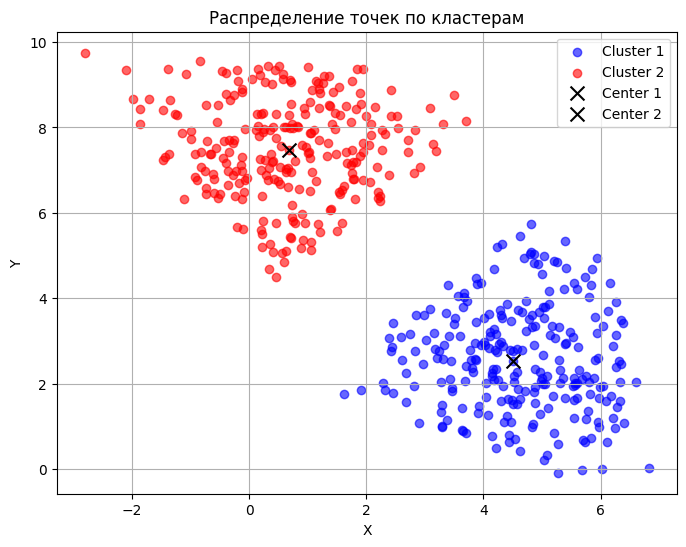

2588.539922 4996.5675034999995


In [ ]:
import matplotlib.pyplot as plt

# Чтение данных из файла
with open("4.txt", "r") as f:
    lines = f.readlines()

a = [[] for _ in range(2)]

# Обработка строк файла
for line in lines[:500]:  # Ограничиваемся 500 записями
    line = line.replace(',', '.')
    try:
        x, y = map(float, line.split('\t'))
        if y < 2 + x:
            a[0].append((x, y))
        else:
            a[1].append((x, y))
    except ValueError:
        continue  # Пропускаем строки с ошибками

colors = ['blue', 'red']
plt.figure(figsize=(8, 6))

# Визуализация кластеров
for i, cluster in enumerate(a):
    if cluster:  # Проверяем, что кластер не пустой
        cluster_x, cluster_y = zip(*cluster)
        plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

s_x = s_y = 0
num_clusters = 0

# Вычисление центроидов (евклидово расстояние)
for i, cluster in enumerate(a):
    if cluster:
        min_dist = float('inf')
        center_x = center_y = 0
        for point in cluster:
            total_dist = sum(((x - point[0])**2 + (y - point[1])**2)**0.5 for x, y in cluster)
            if total_dist < min_dist:
                min_dist = total_dist
                center_x, center_y = point
        s_x += center_x
        s_y += center_y
        num_clusters += 1
        plt.scatter(center_x, center_y, color='black', marker='x', s=100, label=f'Center {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Распределение точек по кластерам')
plt.grid()
plt.show()

# Вывод средних значений центроидов, умноженных на 1000
if num_clusters > 0:
    print((s_x / num_clusters) * 1000, (s_y / num_clusters) * 1000)

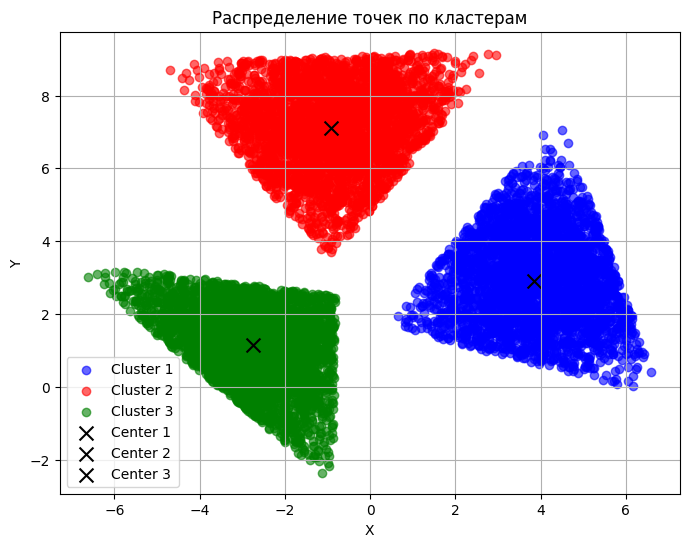

61.652188666666625 3723.3621463333334


In [ ]:
import matplotlib.pyplot as plt

# Чтение данных из файла
with open("5.txt", "r") as f:
    lines = f.readlines()

a = [[] for _ in range(3)]

# Обработка строк файла
for line in lines[:9999]:  # Ограничиваемся 9999 записями
    line = line.replace(',', '.')
    try:
        x, y = map(float, line.split('\t'))
        if x > 0 and y < (3/2) * x + 3:
            a[0].append((x, y))
        elif y > 3.5:
            a[1].append((x, y))
        else:
            a[2].append((x, y))
    except ValueError:
        continue  # Пропускаем строки с ошибками

colors = ['blue', 'red', 'green']
plt.figure(figsize=(8, 6))

# Визуализация кластеров
for i, cluster in enumerate(a):
    if cluster:  # Проверяем, что кластер не пустой
        cluster_x, cluster_y = zip(*cluster)
        plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

s_x = s_y = 0
num_clusters = 0

# Вычисление центроидов (евклидово расстояние)
for i, cluster in enumerate(a):
    if cluster:
        min_dist = float('inf')
        center_x = center_y = 0
        for point in cluster:
            total_dist = sum(((x - point[0])**2 + (y - point[1])**2)**0.5 for x, y in cluster)
            if total_dist < min_dist:
                min_dist = total_dist
                center_x, center_y = point
        s_x += center_x
        s_y += center_y
        num_clusters += 1
        plt.scatter(center_x, center_y, color='black', marker='x', s=100, label=f'Center {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Распределение точек по кластерам')
plt.grid()
plt.show()

# Вывод средних значений центроидов, умноженных на 1000
if num_clusters > 0:
    print((s_x / num_clusters) * 1000, (s_y / num_clusters) * 1000)

# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [ ]:
two_means =
dbscan =

clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("DBSCAN", dbscan),
    )

In [ ]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()